In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [3]:
#Storing the variables in a dataframe
#reading the df to check if it's imported
# successfully
df = pd.read_csv("healthcare_africa.csv")
print(df.head(5))

            Region  Country  Population        Facility Name  Facility Type  \
0   Eastern Rwanda   Rwanda         911   Eastern Facility 1         Clinic   
1   Eastern Rwanda   Rwanda        3958   Eastern Facility 2       Hospital   
2  Southern Zambia   Zambia        3846  Southern Facility 3  Health Center   
3  Eastern Nigeria  Nigeria        9059   Eastern Facility 4         Clinic   
4    Western Kenya    Kenya        6420   Western Facility 5         Clinic   

   Number of Beds  Number of Doctors  Number of Nurses  Annual Patient Visits  \
0               9                  8                26                   2809   
1              20                 10                13                  14996   
2              19                 15                33                  16732   
3              66                 17                19                  19377   
4              93                 20                15                  17500   

   Emergency Response Time (minutes)  

In [5]:
#Getting information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region                             2000 non-null   object 
 1   Country                            2000 non-null   object 
 2   Population                         2000 non-null   int64  
 3   Facility Name                      2000 non-null   object 
 4   Facility Type                      2000 non-null   object 
 5   Number of Beds                     2000 non-null   int64  
 6   Number of Doctors                  2000 non-null   int64  
 7   Number of Nurses                   2000 non-null   int64  
 8   Annual Patient Visits              2000 non-null   int64  
 9   Emergency Response Time (minutes)  2000 non-null   int64  
 10  Funding Received (USD)             2000 non-null   int64  
 11  Electricity Availability           2000 non-null   objec

In [7]:
#Getting Extra Info
df.describe()

,Population,Number of Beds,Number of Doctors,Number of Nurses,Annual Patient Visits,Emergency Response Time (minutes),Funding Received (USD),Patient Satisfaction Rate (%),Average Distance to Facility (km)
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5304.976000,52.869000,10.550500,27.32750,10592.275500,32.412500,106548.139000,77.482350,10.574800
std,2690.392712,27.451952,5.747692,13.22383,5430.797325,16.371052,54309.973557,10.134575,5.550687
min,501.000000,5.000000,1.000000,5.00000,1015.000000,5.000000,10056.000000,60.000000,1.000000
25%,3007.000000,30.000000,6.000000,16.00000,5773.000000,18.000000,59919.250000,68.875000,5.800000
50%,5288.000000,54.000000,11.000000,27.00000,10836.000000,32.000000,108167.500000,77.600000,10.700000
75%,7628.250000,77.000000,15.000000,39.00000,15394.000000,47.000000,154030.500000,86.300000,15.500000
max,9998.000000,100.000000,20.000000,50.00000,20000.000000,60.000000,199658.000000,95.000000,19.900000


In [9]:
# Adding Area Type and (Classifying Areas into Rural and Urban Areas)
def classify_area(row):
    if (row['Population'] > 5000 and 
        row['Electricity Availability'] == "Yes" and 
        row['Internet Availability'] == "Yes" and 
        row['Average Distance to Facility (km)'] < 10):
        return "Urban"
    else:
        return "Rural"
# Apply the function to each row
df['Area Type'] = df.apply(classify_area, axis=1)

In [11]:
# Cheking to see if Area is added
df.head(5)

,Region,Country,Population,Facility Name,Facility Type,Number of Beds,Number of Doctors,Number of Nurses,Annual Patient Visits,Emergency Response Time (minutes),Funding Received (USD),Electricity Availability,Internet Availability,Patient Satisfaction Rate (%),Average Distance to Facility (km),Area Type
0,Eastern Rwanda,Rwanda,911,Eastern Facility 1,Clinic,9,8,26,2809,19,78309,Yes,Yes,69.0,16.6,Rural
1,Eastern Rwanda,Rwanda,3958,Eastern Facility 2,Hospital,20,10,13,14996,12,182049,No,No,68.1,3.6,Rural
2,Southern Zambia,Zambia,3846,Southern Facility 3,Health Center,19,15,33,16732,10,112191,Yes,Yes,74.0,13.2,Rural
3,Eastern Nigeria,Nigeria,9059,Eastern Facility 4,Clinic,66,17,19,19377,58,196483,Yes,Yes,83.7,19.1,Rural
4,Western Kenya,Kenya,6420,Western Facility 5,Clinic,93,20,15,17500,7,89079,Yes,Yes,79.3,8.3,Urban


In [13]:
#checking the number of Health facilities across (Rural and Urban)
df["Area Type"].value_counts()

Area Type
Rural    1873
Urban     127
Name: count, dtype: int64

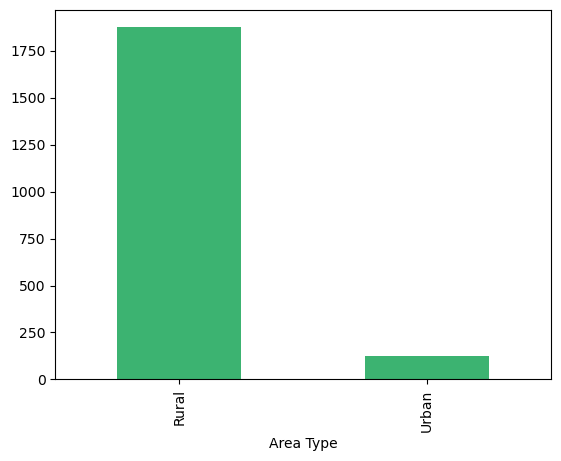

In [15]:
# Visualizing the distribution of facilities across rural and urban
df['Area Type'].value_counts().plot(kind='bar', color ='mediumseagreen')
plt.show()

In [17]:
#Total funding received across (Rural and Urban)
df.groupby('Area Type')['Funding Received (USD)'].sum()

Area Type
Rural    199053973
Urban     14042305
Name: Funding Received (USD), dtype: int64

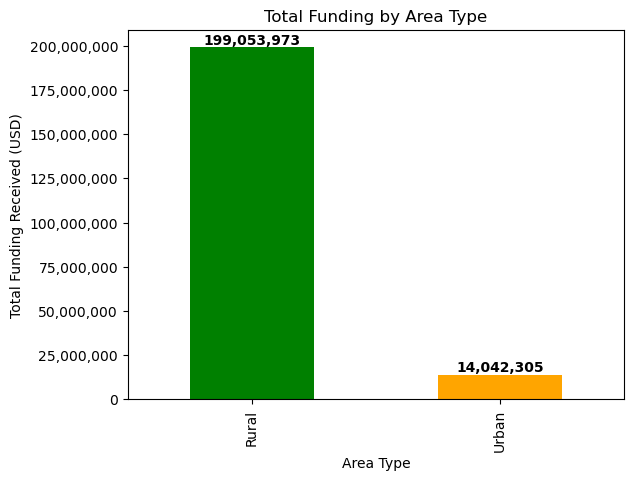

In [21]:
# Grouping and sum funding by Area Type
funding_by_area = df.groupby('Area Type')['Funding Received (USD)'].sum()

# Ploting the funding
ax = funding_by_area.plot(kind='bar', color=['green', 'orange'], title='Total Funding by Area Type')

# Setting y-axis to use plain numbers instead of scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adding data labels on top of bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), f'{int(i.get_height()):,}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labeling the axes
plt.xlabel('Area Type')
plt.ylabel('Total Funding Received (USD)')
plt.show()

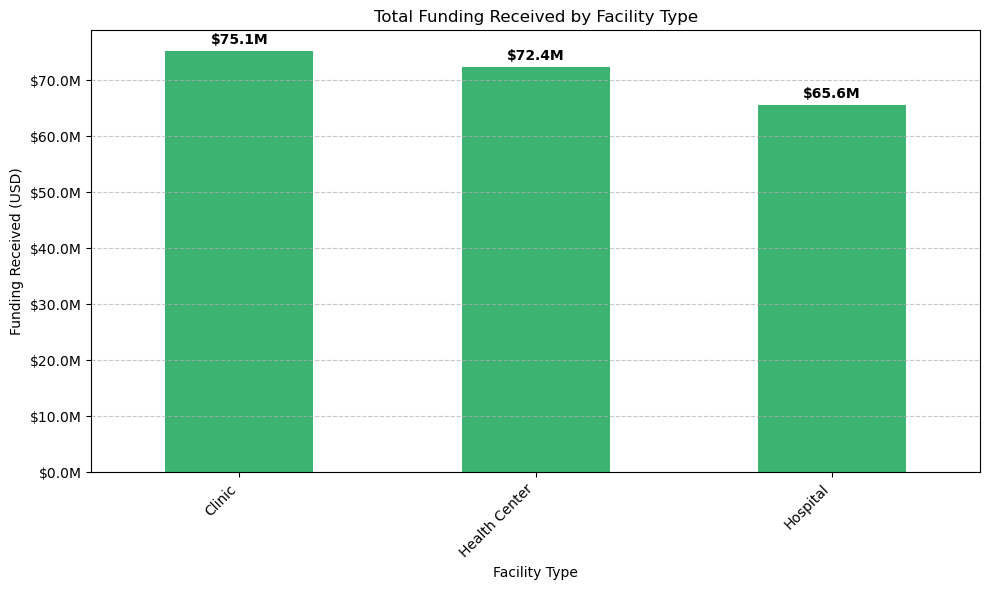

In [23]:
# Grouping by 'Facility Type' and summing the funding
funding_by_facility = df.groupby('Facility Type')['Funding Received (USD)'].sum()

# Plotting
ax = funding_by_facility.plot(kind='bar', color='mediumseagreen', figsize=(10, 6))

# Enhancing the plot
plt.title('Total Funding Received by Facility Type')
plt.xlabel('Facility Type')
plt.ylabel('Funding Received (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatting y-axis in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))

# Adding data labels
for i, value in enumerate(funding_by_facility):
    plt.text(i, value + 0.01 * value, f"${value/1e6:.1f}M", 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [25]:
#Average Emergency Response by Facility Type
df.groupby('Area Type')['Emergency Response Time (minutes)'].mean()

Area Type
Rural    32.321410
Urban    33.755906
Name: Emergency Response Time (minutes), dtype: float64

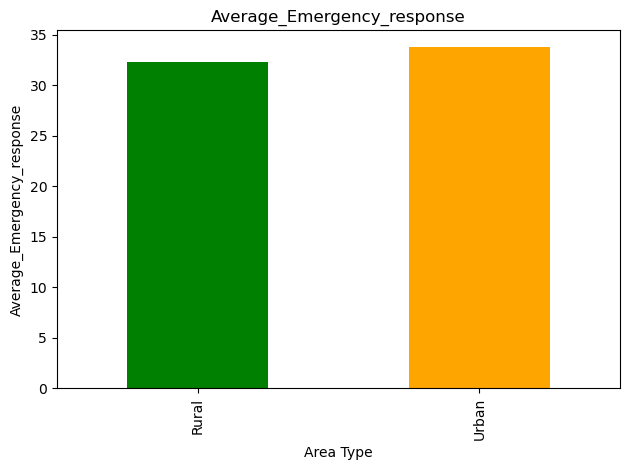

In [29]:
#Visualizing 
Average_Emergency_response = df.groupby('Area Type')['Emergency Response Time (minutes)'].mean()

#Plotting
Average_Emergency_response.plot(kind='bar', color=['green', 'orange'], title='Average_Emergency_response')

# Labeling the axes
plt.xlabel('Area Type')
plt.ylabel('Average_Emergency_response')
# Display the plot
plt.tight_layout()
plt.show()

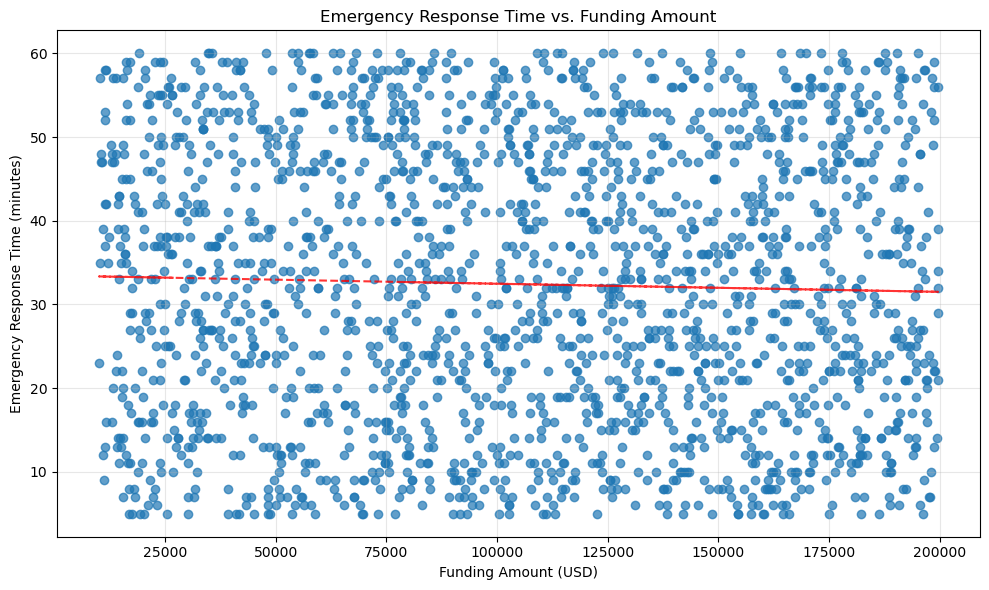

In [31]:
#Imapct of Funding on Emergency Response Time 

# Basic scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['Funding Received (USD)'], df['Emergency Response Time (minutes)'], alpha=0.7)
plt.title('Emergency Response Time vs. Funding Amount')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Emergency Response Time (minutes)')
plt.grid(True, alpha=0.3)

# Adding a trend line
z = np.polyfit(df['Funding Received (USD)'], df['Emergency Response Time (minutes)'], 1)
p = np.poly1d(z)
plt.plot(df['Funding Received (USD)'], p(df['Funding Received (USD)']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

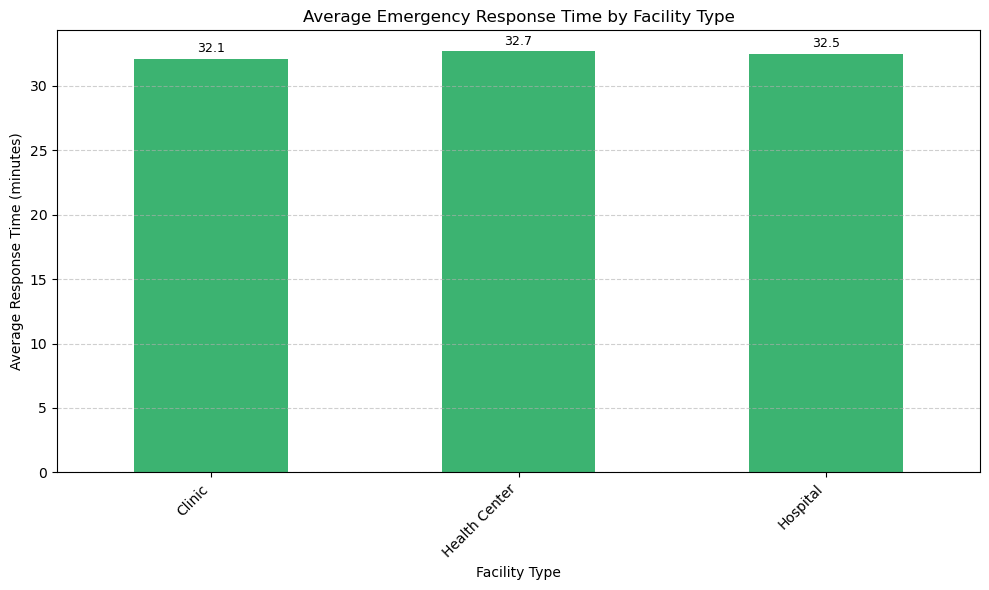

In [33]:
# Grouping by facility type and computing average emergency response time
avg_response_by_facility = df.groupby('Facility Type')['Emergency Response Time (minutes)'].mean()

# Plotting
ax = avg_response_by_facility.plot(kind='bar', color='mediumseagreen', figsize=(10, 6))

plt.title('Average Emergency Response Time by Facility Type')
plt.xlabel('Facility Type')
plt.ylabel('Average Response Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding data labels
for i, val in enumerate(avg_response_by_facility):
    plt.text(i, val + 0.5, f"{val:.1f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [37]:
# Calculating the average funding per visit by facility type
df['Funding per Visit (USD)'] = df['Funding Received (USD)'] / df['Annual Patient Visits']
avg_funding_per_type = df.groupby('Facility Type')['Funding per Visit (USD)'].mean().reset_index()
print (avg_funding_per_type)

   Facility Type  Funding per Visit (USD)
0         Clinic                16.763329
1  Health Center                17.142149
2       Hospital                16.352145


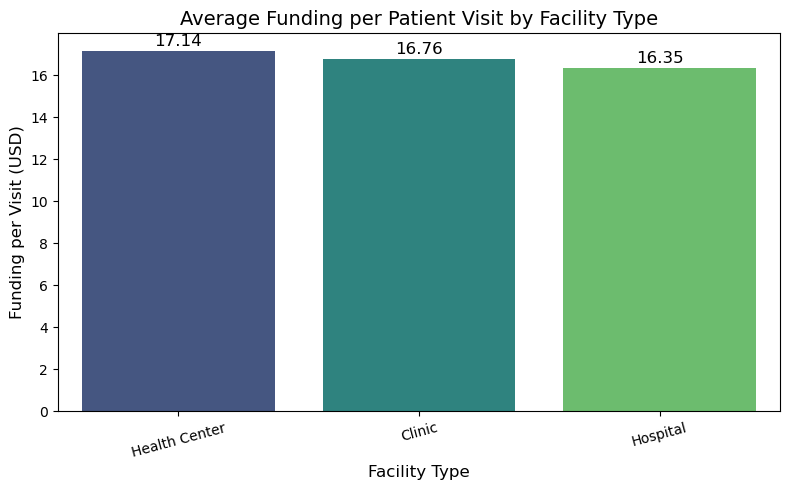

In [41]:
#Average Funding Per Patient

# Sort the data in descending order
avg_funding_sorted = avg_funding_per_type.sort_values(by='Funding per Visit (USD)', ascending=False)

# Create the barplot
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Facility Type',
    y='Funding per Visit (USD)',
    hue='Facility Type',
    data=avg_funding_sorted,
    palette='viridis',
    legend=False
)

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.1,  # slightly above the bar
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=12
    )

# Add labels and title
plt.title('Average Funding per Patient Visit by Facility Type', fontsize=14)
plt.xlabel('Facility Type', fontsize=12)
plt.ylabel('Funding per Visit (USD)', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()

# Show the plot
plt.show()

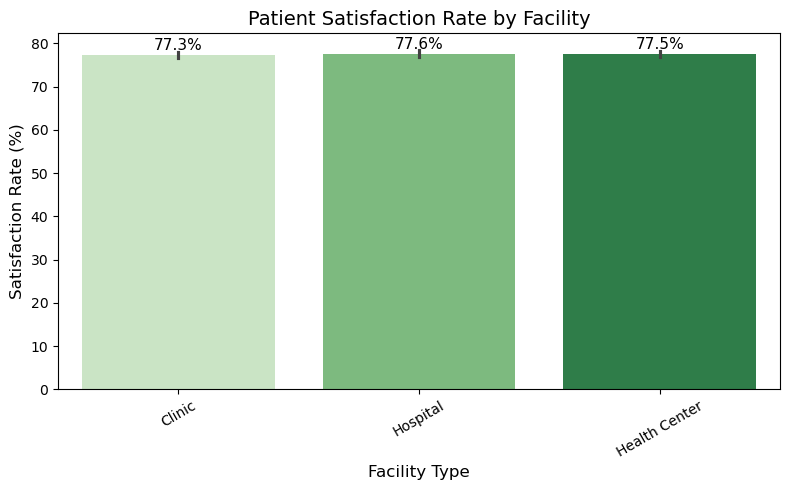

In [43]:
#Patient Satisafction Rate based on Facility Type

# Sort the data in descending order
sorted_df  = df.sort_values(by='Patient Satisfaction Rate (%)', ascending=False)

# Create the barplot
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Facility Type',
    y='Patient Satisfaction Rate (%)',
    hue='Facility Type',
    data=df,
    palette='Greens',
    legend=False
)

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=11
    )

# Enhance the plot
plt.title('Patient Satisfaction Rate by Facility', fontsize=14)
plt.xlabel('Facility Type', fontsize=12)
plt.ylabel('Satisfaction Rate (%)', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

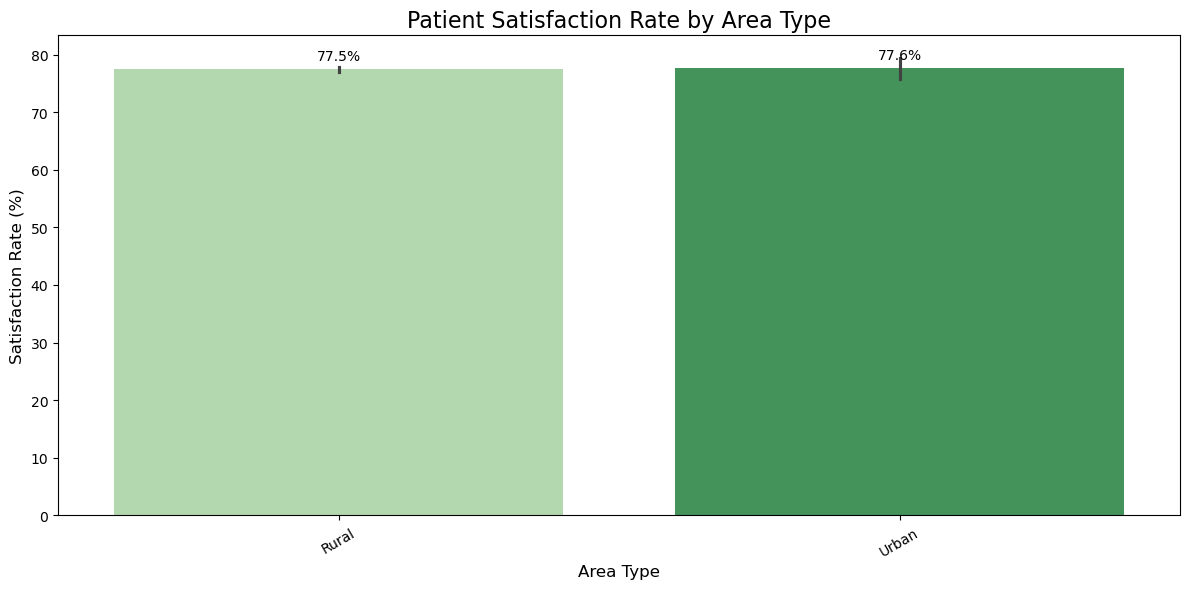

In [45]:
#Satisfaction By Area Type

plt.figure(figsize=(12, 6))  # Wider figure
ax = sns.barplot(
    x='Area Type',
    y='Patient Satisfaction Rate (%)',
    hue='Area Type',
    data=df,
    palette='Greens',
    legend=False
)

# Title and axis formatting
plt.title('Patient Satisfaction Rate by Area Type', fontsize=16)
plt.xlabel('Area Type', fontsize=12)
plt.ylabel('Satisfaction Rate (%)', fontsize=12)
plt.xticks(rotation=30)

# Add value labels on each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

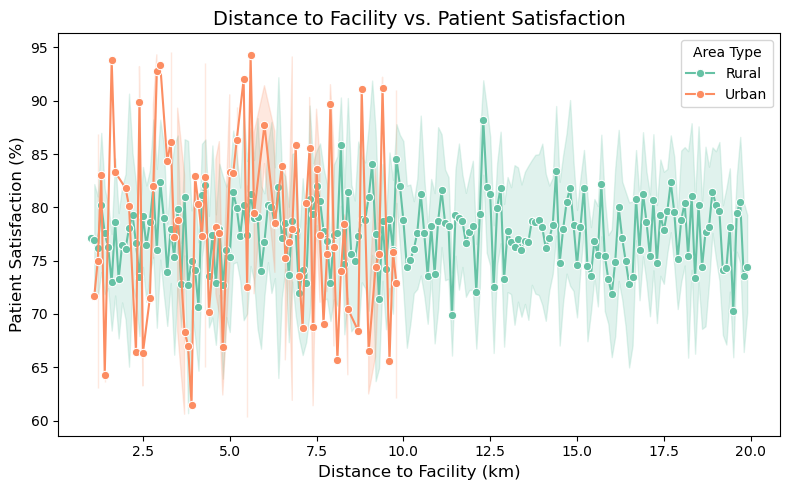

In [47]:
#comparing satisafction rates and distance from facility
plt.figure(figsize=(8, 5))

# Line plot grouped by Area Type
sns.lineplot(
    data=df.sort_values('Average Distance to Facility (km)'),  # ensure proper order
    x='Average Distance to Facility (km)',
    y='Patient Satisfaction Rate (%)',
    hue='Area Type',
    marker='o',
    palette='Set2'
)

plt.title('Distance to Facility vs. Patient Satisfaction', fontsize=14)
plt.xlabel('Distance to Facility (km)', fontsize=12)
plt.ylabel('Patient Satisfaction (%)', fontsize=12)
plt.tight_layout()
plt.show()

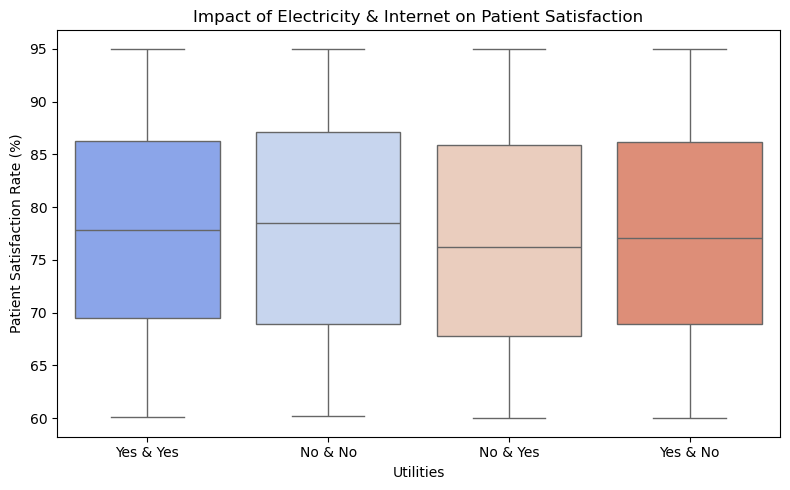

In [49]:
# Combining Electricity and Internet into a new coulmn called "Utilities" to assess Pateint Satisafction Rate
df['Utilities'] = df['Electricity Availability'] + ' & ' + df['Internet Availability']

plt.figure(figsize=(8, 5))
sns.boxplot(x='Utilities', y='Patient Satisfaction Rate (%)', hue='Utilities', data=df, palette='coolwarm', legend=False)
plt.title('Impact of Electricity & Internet on Patient Satisfaction')
plt.tight_layout()
plt.show()

In [57]:
#Distribution of Drs: Nurse  by Area Type

staff_distribution = df.groupby('Area Type')[['Number of Doctors', 'Number of Nurses']].sum().reset_index()
print (staff_distribution)

  Area Type  Number of Doctors  Number of Nurses
0     Rural              19791             51185
1     Urban               1310              3470


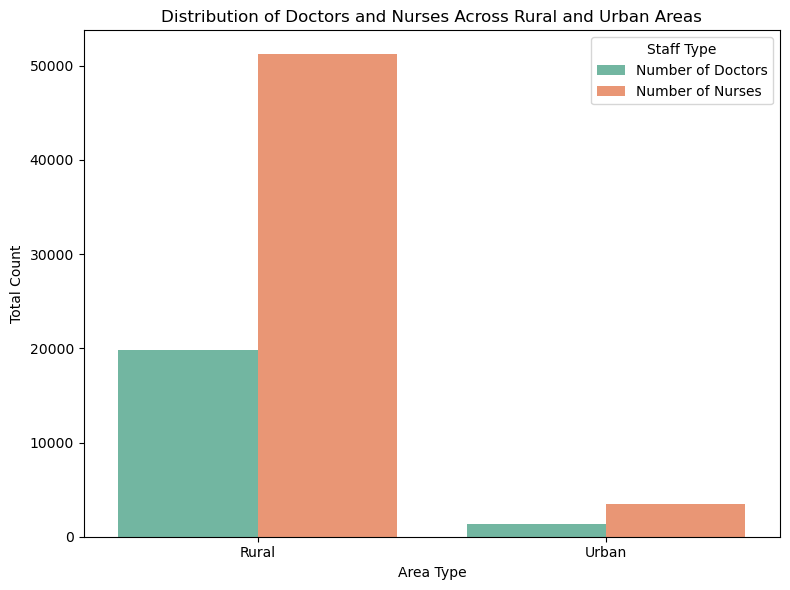

In [51]:
#Distribution of Drs: Nurse  by Area Type

# Grouping data by Area Type and summing number of Doctors and Nurses
staff_distribution = df.groupby('Area Type')[['Number of Doctors', 'Number of Nurses']].sum().reset_index()

# Melt the DataFrame for easier plotting
staff_melted = pd.melt(staff_distribution, id_vars='Area Type', 
                       value_vars=['Number of Doctors', 'Number of Nurses'],
                       var_name='Staff Type', value_name='Count')

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Area Type', y='Count', hue='Staff Type', data=staff_melted, palette='Set2')
plt.title('Distribution of Doctors and Nurses Across Rural and Urban Areas')
plt.ylabel('Total Count')
plt.xlabel('Area Type')
plt.tight_layout()
plt.show()

In [55]:
# Calculating the No of staff_by_facility type

staff_by_facility = df.groupby('Facility Type')[['Number of Doctors', 'Number of Nurses']].sum().reset_index()
print (staff_by_facility)

   Facility Type  Number of Doctors  Number of Nurses
0         Clinic               7266             19346
1  Health Center               7201             18465
2       Hospital               6634             16844


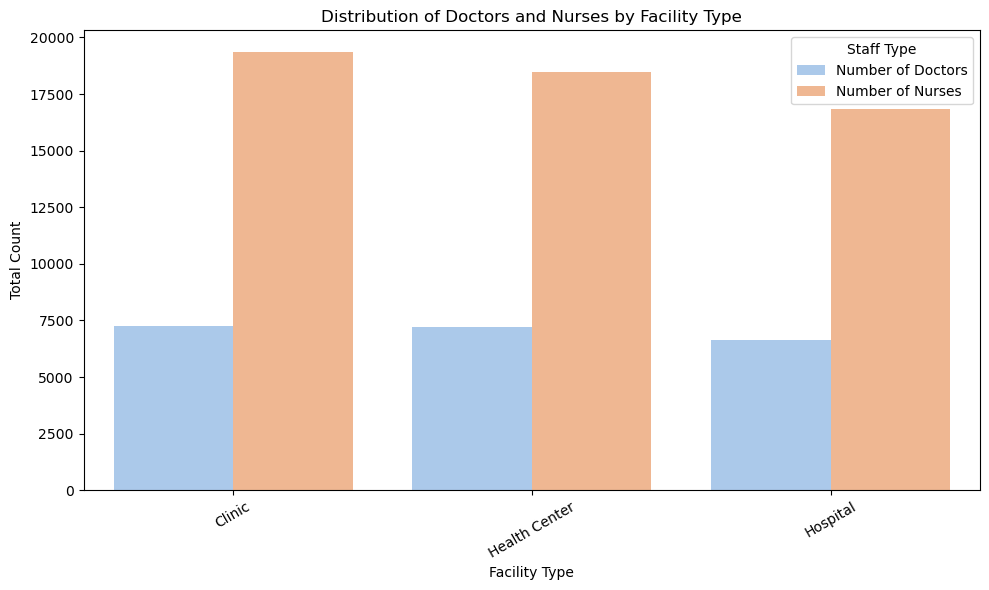

In [53]:
# Group the data by Facility Type and sum the doctors and nurses
staff_by_facility = df.groupby('Facility Type')[['Number of Doctors', 'Number of Nurses']].sum().reset_index()

# Melt the dataframe for easier plotting
staff_melted = pd.melt(staff_by_facility, id_vars='Facility Type', 
                       value_vars=['Number of Doctors', 'Number of Nurses'],
                       var_name='Staff Type', value_name='Count')

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Facility Type', y='Count', hue='Staff Type', data=staff_melted, palette='pastel')
plt.title('Distribution of Doctors and Nurses by Facility Type')
plt.xticks(rotation=30)
plt.xlabel('Facility Type')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

In [63]:
#Total Funding By Region
funding_by_region = df.groupby('Region')['Funding per Visit (USD)'].sum().sort_values(ascending=False).reset_index()
print(funding_by_region)

             Region  Funding per Visit (USD)
0   Southern Zambia              4222.018861
1     Dar es Salaam              4043.575759
2    Central Malawi              3522.123190
3    Western Uganda              3471.554683
4   Eastern Nigeria              3331.901277
5  Eastern Ethiopia              3216.596010
6    Northern Ghana              3005.169204
7     Western Kenya              2968.737043
8    Eastern Rwanda              2924.518768
9   Central Senegal              2820.692080


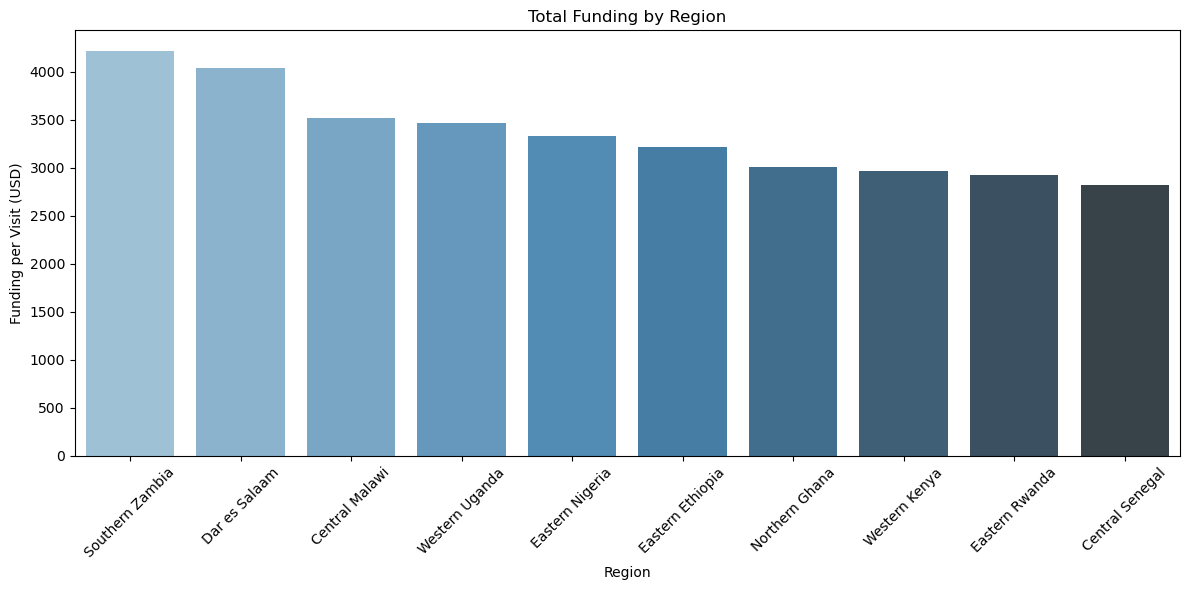

In [59]:
# Group the data by Region and sum the funding
funding_by_region = df.groupby('Region')['Funding per Visit (USD)'].sum().reset_index()

# Sort regions by total funding (optional)
funding_by_region = funding_by_region.sort_values('Funding per Visit (USD)', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Funding per Visit (USD)', hue='Region', data=funding_by_region, palette='Blues_d', legend=False)
plt.title('Total Funding by Region')
plt.xlabel('Region')
plt.ylabel('Funding per Visit (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
#Average Distance by Region
avg_distance = df.groupby(['Region', 'Facility Type'])['Average Distance to Facility (km)'].mean().sort_values(ascending=False).reset_index()
print(avg_distance)                                                                                                            

              Region  Facility Type  Average Distance to Facility (km)
0     Central Malawi         Clinic                          11.843662
1     Eastern Rwanda         Clinic                          11.736066
2    Eastern Nigeria       Hospital                          11.605455
3      Western Kenya         Clinic                          11.209589
4     Northern Ghana         Clinic                          11.190000
5      Dar es Salaam       Hospital                          11.104615
6     Western Uganda       Hospital                          11.051724
7     Central Malawi       Hospital                          10.966102
8    Central Senegal       Hospital                          10.946875
9   Eastern Ethiopia         Clinic                          10.872059
10   Southern Zambia         Clinic                          10.842857
11   Eastern Nigeria  Health Center                          10.824638
12   Central Senegal  Health Center                          10.718919
13    

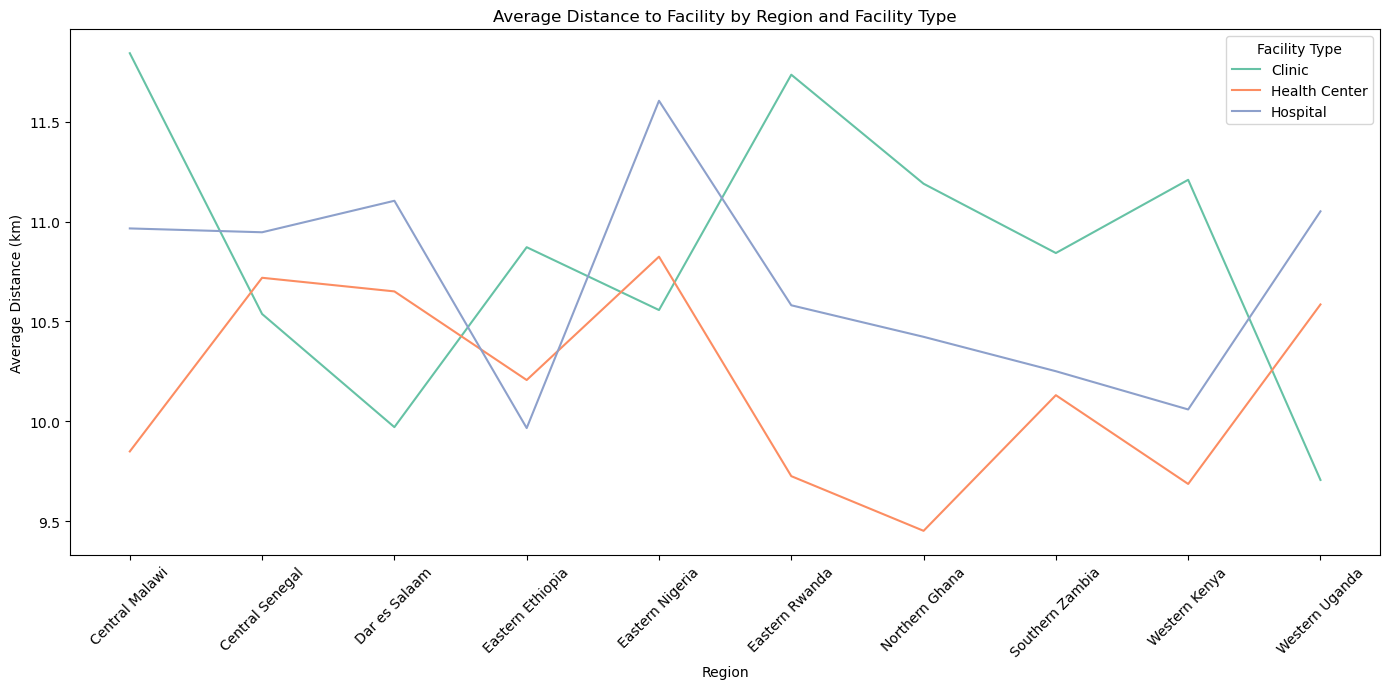

In [65]:
# Grouping the data by Region and Facility Type, then calculating the mean distance
avg_distance = df.groupby(['Region', 'Facility Type'])['Average Distance to Facility (km)'].mean().reset_index()

# Plotting a grouped bar chart
plt.figure(figsize=(14, 7))
sns.lineplot(x='Region', y='Average Distance to Facility (km)', hue='Facility Type', data=avg_distance, palette='Set2')

plt.title('Average Distance to Facility by Region and Facility Type')
plt.xlabel('Region')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45)
plt.legend(title='Facility Type')
plt.tight_layout()
plt.show()